# Ejercicios de Aprendizaje automatico.

### Realizado por Araceli Macía Barrado

------
## Ejercicio 1.

En el “groceries.csv” contiene las transacciones recogidas durante un mes en una tienda de comestibles. En cada una de las filas de este archivo se encuentran los artículos comprados de forma conjunta por los diferentes clientes. Obtener las lista de artículos que tiene un soporte mínimo de 0,15. Obtener también las reglas de asociación que se pueden deducir de este conjunto de datos con un soporte mínimo de 0,05 y confianza de 0,25.



In [1]:
# Importacion de las librerias que van a hacer falta
import numpy as np
print 'numpy version:', np.__version__

# Plotting 2D con matplotlib:
import matplotlib
print 'matplotlib version:', matplotlib.__version__

# Indica que se incrusten los gráficos en el Notebook.
%matplotlib inline 

import pandas as pd
print 'pandas version:', pd.__version__

import sklearn
print 'scikit-learn version:', sklearn.__version__

import csv
import apriori #El programa apriori lo tenemos en la carpeta donde esta el ejercicio.

numpy version: 1.10.4
matplotlib version: 1.5.1
pandas version: 0.18.0
scikit-learn version: 0.17.1


In [2]:
#leemos el fichero.
groceries =  []
groceries_file = csv.reader(open("groceries.csv", "rb"))
for row in groceries_file:
    groceries.append(row)


In [3]:
#Vemos cual es el numero de elementos que se han cargado.
len(groceries)

9835

### a. Obtener las lista de artículos que tiene un soporte mínimo de 0,15

In [4]:
F, soporte = apriori.apriori(groceries, min_support=0.15, verbose=True) #soporte minimo es 15%

{soda}:  sup = 0.174
{whole milk}:  sup = 0.256
{other vegetables}:  sup = 0.193
{rolls/buns}:  sup = 0.184


**Es decir, que la lista de articulos que tienen un soporte de 0,15 es, es decir que aparecen en un 15% de los tickets son :soda, whole Milk, other vegetables y rolls/buns.**

### b. Obtener también las reglas de asociación que se pueden deducir de este conjunto de datos con un soporte mínimo de 0,05 y confianza de 0,25.


In [5]:
F2, soporte2 = apriori.apriori(groceries, min_support=0.05, verbose=True) #soporte minimo es 5%
#Con esta instruccion obtenemos la lista de articulos que tienen un soporte de 0.05

{citrus fruit}:  sup = 0.083
{curd}:  sup = 0.053
{root vegetables}:  sup = 0.109
{shopping bags}:  sup = 0.099
{bottled beer}:  sup = 0.081
{butter}:  sup = 0.055
{newspapers}:  sup = 0.08
{napkins}:  sup = 0.052
{pip fruit}:  sup = 0.076
{domestic eggs}:  sup = 0.063
{bottled water}:  sup = 0.111
{tropical fruit}:  sup = 0.105
{soda}:  sup = 0.174
{whole milk}:  sup = 0.256
{other vegetables}:  sup = 0.193
{canned beer}:  sup = 0.078
{frankfurter}:  sup = 0.059
{sausage}:  sup = 0.094
{yogurt}:  sup = 0.14
{pastry}:  sup = 0.089
{margarine}:  sup = 0.059
{coffee}:  sup = 0.058
{brown bread}:  sup = 0.065
{fruit/vegetable juice}:  sup = 0.072
{whipped/sour cream}:  sup = 0.072
{pork}:  sup = 0.058
{rolls/buns}:  sup = 0.184
{beef}:  sup = 0.052
{whole milk, yogurt}:  sup = 0.056
{whole milk, rolls/buns}:  sup = 0.057
{whole milk, other vegetables}:  sup = 0.075


Ahora hemos obtenido la lista de articulos que se dan mas 5% de las veces. Hay muy pocas combinaciones de articulos.
La leche es el articulo que mas veces se compra, y por ello vemos que es el unico que se ha encontrado combinado con otros con un soporte de 5%. Si bajamos el soporte, aparecen muchos mas articulos y combinaciones.

In [6]:
H1 = apriori.generate_rules(F2, soporte2, min_confidence=0.25, verbose=True)


{yogurt} ---> {whole milk}:  conf = 0.402, sup = 0.056
{rolls/buns} ---> {whole milk}:  conf = 0.308, sup = 0.057
{other vegetables} ---> {whole milk}:  conf = 0.387, sup = 0.075
{whole milk} ---> {other vegetables}:  conf = 0.293, sup = 0.075


Segun el resultado vemos que la regla de asociacion mas alta, es que cuando se compra yogur el 40% de las veces tambien se compra leche. Teniendo en cuanto que la compra de leche y yogur se da en el 5% de los tickets. 

Y la que menos confianza tiene es la que dice que cuando se compra leche tambien se compran otros verduras con un 29%, sabiendo que ambos articulos aparecen juntos el 7% de las veces.

Estos datos son llamativos

{yogurt} ---> {whole milk}:  conf = 0.402, sup = 0.056


{other vegetables} ---> {whole milk}:  conf = 0.387, sup = 0.075

se compra mas veces verdudas y leche que yogures y leche, pero como el numero de veces que se compra yogures es inferior al numero de veces que se compra verduras, resulta que existe mas confianza que comprando yogures se compré tambien leche.. supongo que dependiendo de lo que cuesta cada cosa nos interesa mas tener una cosa en cuenta que la otra.


------------------

## Ejercicio 2. Implementación de una regresión “stepwise” con eliminación hacia atrás. (40 puntos)


Utilizando como referencia el código del algoritmo “stepwise” con selección hacia adelante (Fordward Stepwise Regression) que se encuentra en el archivo “CIF005_02_06_Stepwise.ipynb” realizar una implementación del del algoritmo con eliminación hacia atrás (Backward Stepwise Regression). En este caso la selección de las variables se realiza empezando con un modelo que utiliza todas la variables disponibles para ir eliminando en cada paso la produce el modelo menos significativo.

In [7]:
%pylab
%matplotlib inline
import pandas as pd


from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

# Separación de la variable objetivo y las explicativas
wine = pd.read_csv('winequality-white.csv', sep = ';')

target = 'quality'
features = list(wine.columns)
features.remove('quality')

x = wine[features]
y = wine[target]

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [8]:
def Backward_regression(x, y): #version buena.
    
    x_train, x_test, y_train, y_test = train_test_split(x, y)

    # Modelo para realizar los ajustes
    model = LinearRegression()

    # Variable para almecena los índices de la lista de atributos usados
    feature_error = []
    feature_names = []
    orden_categorias = [] 
    
    #Lo primero que hacemos es ejecutar el modelo con todas las variables que va a ser nuestro punto de partida.    
    feature_list = list(x.columns) # los nombres de las variables.
    feature_order = [val for val in range(len(feature_list))]
    use_train = x_train[x_train.columns[feature_order]]
    use_test = x_test[x_train.columns[feature_order]]
    model.fit(use_train, y_train)
    rmsError = np.linalg.norm((y_test - model.predict(use_test)), 2)/sqrt(len(y_test))
    feature_error= rmsError    #almaceno el error para compararlo.
    #print "....."
    #print "Entro con variables :", feature_order, " y con error : ", feature_error
    
    
    idx_try=[val for val in range(len(feature_list))] #inicializo con todas las variables. 
    print "Inicio - tratando ", idx_try, "- error :", feature_error
    for i in range(len(feature_list)):    
      
        #print "-----------"
        #print "Bucle principal i- ", i,"-->" ,idx_try
        
        orden_categorias=[] #vector para guardar las categorias que estamos probando
        iter_error = []
        #bucle para ir quitando cada vez una variable y almacenar el resultado dle modelo sin es variable.
        for i_try in idx_try:
            useRow=idx_try[:]
            useRow.remove(i_try)  #cada vez quito una variable.
            use_train = x_train[x_train.columns[useRow]]
            use_test = x_test[x_train.columns[useRow]]
            model.fit(use_train, y_train)
            rmsError = np.linalg.norm((y_test - model.predict(use_test)), 2)/sqrt(len(y_test))
            iter_error.append(rmsError)
            orden_categorias.append(i_try)
            #print i_try, "-useRow", useRow , "iter_error :", rmsError
            
        
        #Guardamos la posicion de la combinacion con el menor error, pero en iter_error
        pos_best = np.argmin(iter_error)   
        
        #print ">> minimo error posicion del vector Error" , pos_best 
        #print "error ahora es ", iter_error[pos_best]
        #print "error anterior es", feature_error
        #print "orden_categorias es" , orden_categorias[pos_best]
        
        #Si el error de ahora es menor que el error anterior , me quedo con ese valor y continuo
        if (iter_error[pos_best] < feature_error):
            idx_try.remove(orden_categorias[pos_best])
            feature_error=iter_error[pos_best] #guardo el error actual, que es el que tngo que conseguir bajar.
            feature_names= x_train.columns[idx_try]            
            #print "idx_try", idx_try, '--', len(feature_order)
            #print "error ahora menor, me quedo con idx_try modificado."
            print "Paso ", i , "- tratando ", idx_try, "- error :", feature_error
       
        else:
            #print "* Error ahora mayor, me quedo con idx_try", idx_try
            feature_names=x_train.columns[idx_try]
            return feature_names,feature_error
        
        #si ya solo me quedaba una categoria, salimos porque ya la habremos analizado en el paso anterior.
        if len(idx_try) == 1:
            return feature_names,feature_error
      
    
    
Backward_regression(x, y)  


Inicio - tratando  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] - error : 0.764522519293
Paso  0 - tratando  [0, 1, 2, 3, 5, 6, 7, 8, 9, 10] - error : 0.763679137234
Paso  1 - tratando  [0, 1, 2, 3, 6, 7, 8, 9, 10] - error : 0.76338409978
Paso  2 - tratando  [0, 1, 2, 3, 7, 8, 9, 10] - error : 0.762951161379


(Index([u'fixed acidity', u'volatile acidity', u'citric acid',
        u'residual sugar', u'density', u'pH', u'sulphates', u'alcohol'],
       dtype='object'), 0.76295116137929941)

----------

## Ejercicio 3. Estimación de la supervivencia de los pasajeros del Titanic


Utilizando los datos del archivo “titanic.csv”, que contienen información del pasaje del Titanic, para la creación de un modelo que pueda predecir si un pasajero sobrevive al hundimiento del barco en el momento de embarque. Para esto se han de seleccionar la variables con mayor capacidad de predicción.
Para la creación del modelo no se pueden utilizar las variables “boat” ni “body” ya que estas contienen información posterior al momento del embarque.
En el conjunto de datos existes valores NaN en las columnas “age” y “fare”, para eliminar las filas con estos valores se puede utilizar el siguiente comando:

  mask = titanic[['age', 'fare']].applymap(lambda x: math.isnan(x))
  
  
  titanic = titanic[-mask.any(axis = 1)]


### 1. Lectura del fichero.

In [9]:
import pandas as pd
titanic = pd.read_csv('titanic.csv', sep = ',')
titanic.head(n = 5)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### 2. Seleccion de variables.

Las caracteristicas del fichero son estas:

pclass	: Clase en que viajaban. Es categorica.

survived : Variable respuesta.

**name** : Nombre. Identificador	

sex: Sexo del viajero. Categorica.

age	: Edad. Variable continua,

sibsp: sibsp numero de hermanos o esposos del viajero. Variable discreta.

parch: Number of padres o hijos del viajero. Variable discreta.

**ticket**: Numero del ticket. es un Identificador.

fare: precio del billete. Variable continua? 

**cabin** : Numero de cabina en que viajaban. Variable categorica.

**embarked**: Puerto de embarque. Identificador.

**boat** : Variable a eliminar ,no se sabia de antemano	

**body** : Variable a eliminar ,no se sabia de antemano	

**home.dest** : Puerto destino.


- Lo primero que vamos a realizar es eliminar del estudio las variables que son identificadores y que por tanto no aportan al modelo : name, ticket, embarked, cabin,  boat, body y home.dest

No creo que las variables de embarked','home.dest', aporten al modelo..

Trabajaremos con el resto, aunque ya veo que hay variables que tienen la misma informacion, ya que estan relacionadas, como pclass y fare. Pero las voy a dejar.



In [10]:

#eliminacion  nulos.
#Eliminacion de nulos.
print titanic.shape
mask            = titanic[['age','fare']].applymap(lambda x: math.isnan(x))
titanic_not_null = titanic[-mask.any(axis=1)] #eliminamos los nulos de edad.
print titanic_not_null.shape  #aqui se ve el dataset resultante de la eliminacion de nulos.





(1309, 14)
(1045, 14)


In [11]:
titanic_not_null.T.apply(lambda x: x.nunique(), axis=1)


pclass          3
survived        2
name         1043
sex             2
age            97
sibsp           7
parch           7
ticket        731
fare          256
cabin         174
embarked        3
boat           26
body          119
home.dest     348
dtype: int64

Viendo los posibles valores de las variables, confirmamos que las variables de name, ticket, home_dest,cabin tiene muchos valores, son identificadores y las quitamos de modelo.

In [13]:
#Separo las variables que vamos a incluir en el estudio.
var_categoricas = ['pclass','sibsp','parch','sex','embarked' ]
var_numericas   = ['age','fare']
var_target      = titanic_not_null['survived'] == 1

### 2.1 Analisis de las variables discretas.

Vamos a analizar los niveles que tienen cada una de las variables discretas.



In [14]:
def tabla_frecuencias():
    for var in var_categoricas:
        print "Tabla de frecuencias para:", var
        print pd.crosstab(titanic_not_null['survived'], titanic_not_null[var])
        print

tabla_frecuencias()

Tabla de frecuencias para: pclass
pclass      1    2    3
survived               
0         103  146  369
1         181  115  131

Tabla de frecuencias para: sibsp
sibsp       0    1   2   3   4  5  8
survived                            
0         429  133  20  10  19  6  1
1         255  147  16   6   3  0  0

Tabla de frecuencias para: parch
parch       0   1   2  3  4  5  6
survived                         
0         497  65  42  3  4  5  2
1         270  95  55  5  1  1  0

Tabla de frecuencias para: sex
sex       female  male
survived              
0             96   522
1            292   135

Tabla de frecuencias para: embarked
embarked    C   Q    S
survived              
0          80  37  501
1         132  13  280



> Segun lo que vemos en los resultados, las niveles de  sibsps, parch y embarked se pueden agrupar, puesto que hay niveles que tienen pocos valores. Para ello vamos a estudiar el WOE de cada nivel, el valor que indica la capacidad predictiva de cada una de los niveles. 

In [15]:
def get_WoE(data, var, target):
    crosstab = pd.crosstab(data[target], data[var])
    
    print "Obteniendo el Woe para la variable", var, ":"
    
    for col in crosstab.columns:
        if crosstab[col][1] == 0:
            print "  El WoE para", col, "[", sum(crosstab[col]), "] es infinito"
        else:
            print "  El WoE para", col, "[", sum(crosstab[col]), "] es", np.log(float(crosstab[col][0]) / float(crosstab[col][1]))
            

In [16]:
# Empezamos por sibsp
get_WoE(titanic_not_null, 'sibsp', 'survived') 


Obteniendo el Woe para la variable sibsp :
  El WoE para 0 [ 684 ] es 0.52019337377
  El WoE para 1 [ 280 ] es -0.100083458557
  El WoE para 2 [ 36 ] es 0.223143551314
  El WoE para 3 [ 16 ] es 0.510825623766
  El WoE para 4 [ 22 ] es 1.8458266905
  El WoE para 5 [ 6 ] es infinito
  El WoE para 8 [ 1 ] es infinito


Segun los resultados, voy a unir los de los niveles 5 y 8 con valor infinito, con el 1. Son los 3 que tienen WOE menor.  Y tambien voy a unir el 0 y el 3 que tienen valores similares.


In [17]:
titanic_not_null.loc[:, 'sibsp_n'] = None

for row in titanic_not_null.index:
    if titanic_not_null.loc[row, 'sibsp'] in (1, 5, 8):
        titanic_not_null.loc[row, 'sibsp_n'] = 'n0'
    elif titanic_not_null.loc[row, 'sibsp'] in (0, 3):
        titanic_not_null.loc[row, 'sibsp_n'] = 'n1'
    else:
        val = titanic_not_null.loc[row, 'sibsp']
        titanic_not_null.loc[row, 'sibsp_n'] = val

print "--- fin ---- "
get_WoE(titanic_not_null, 'sibsp_n', 'survived') 
var_categoricas = ['pclass','sibsp_n','parch','sex', 'embarked'] #modifico mi lista de variables de estudio.



/Users/aramaciabarrado/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/aramaciabarrado/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


--- fin ---- 
Obteniendo el Woe para la variable sibsp_n :
  El WoE para 2 [ 36 ] es 0.223143551314
  El WoE para 4 [ 22 ] es 1.8458266905
  El WoE para n0 [ 287 ] es -0.0487901641694
  El WoE para n1 [ 700 ] es 0.519979005752


los niveles 2 y 4 tienen pocos niveles..  vamos a agrupar en dos niveles, uno con valores positivos y otro con valores negativos

In [18]:
titanic_not_null.loc[:, 'sibsp_n2'] = None
titanic_not_null.loc[:, 'sibsp_n2'] = titanic_not_null['sibsp_n'].map(lambda x: 'n0' if x == 'n0' else 'n1')

get_WoE(titanic_not_null, 'sibsp_n2', 'survived') 
var_categoricas = ['pclass','sibsp_n2','parch','sex', 'embarked'] #modifico mi lista de variables de estudio.

Obteniendo el Woe para la variable sibsp_n2 :
  El WoE para n0 [ 287 ] es -0.0487901641694
  El WoE para n1 [ 758 ] es 0.534821129322


In [19]:
# seguimos  por parch
get_WoE(titanic_not_null, 'parch', 'survived') 

Obteniendo el Woe para la variable parch :
  El WoE para 0 [ 767 ] es 0.610168067098
  El WoE para 1 [ 160 ] es -0.379489621705
  El WoE para 2 [ 97 ] es -0.269663566949
  El WoE para 3 [ 8 ] es -0.510825623766
  El WoE para 4 [ 5 ] es 1.38629436112
  El WoE para 5 [ 6 ] es 1.60943791243
  El WoE para 6 [ 2 ] es infinito


Ahora voy a unir el 1,2,3 y 6 con valores muy pequeños. Y los valores 4 y 5 tambien los uno.
 

In [20]:
titanic_not_null.loc[:, 'parch_n'] = None

for row in titanic_not_null.index:
    if titanic_not_null.loc[row, 'parch'] in (1, 2, 3,6):
        titanic_not_null.loc[row, 'parch_n'] = 'n0'
    elif titanic_not_null.loc[row, 'parch'] in (4,5):
        titanic_not_null.loc[row, 'parch_n'] = 'n1'
    else:
        val = titanic_not_null.loc[row, 'parch']
        titanic_not_null.loc[row, 'parch_n'] = val
print "--- fin ---- "
get_WoE(titanic_not_null, 'parch_n', 'survived') 
var_categoricas = ['pclass','sibsp_n2','parch_n','sex','embarked'] #modifico mi lista de variables de estudio.


--- fin ---- 
Obteniendo el Woe para la variable parch_n :
  El WoE para 0 [ 767 ] es 0.610168067098
  El WoE para n0 [ 267 ] es -0.324926245624
  El WoE para n1 [ 11 ] es 1.50407739678


In [21]:
#Ahora agrupo los niveles 0 y n1, ya que n1 tiene muy pocos registros. Los agrupo con el criterio de que ambos son
#positivos.
titanic_not_null.loc[:, 'parch_n2'] = None
titanic_not_null.loc[:, 'parch_n2'] = titanic_not_null['parch_n'].map(lambda x: 'n0' if x == 'n0' else 'n1')

get_WoE(titanic_not_null, 'parch_n2', 'survived') 
var_categoricas = ['pclass','sibsp_n2','parch_n2','sex', 'embarked'] #modifico mi lista de variables de estudio.

Obteniendo el Woe para la variable parch_n2 :
  El WoE para n0 [ 267 ] es -0.324926245624
  El WoE para n1 [ 778 ] es 0.620734602991


In [22]:
# la variable embarKed tambien la voy a discretizar
get_WoE(titanic_not_null, 'embarked', 'survived') 


Obteniendo el Woe para la variable embarked :
  El WoE para C [ 212 ] es -0.500775287912
  El WoE para Q [ 50 ] es 1.04596855518
  El WoE para S [ 781 ] es 0.581816497916


In [23]:
#Ahora agrupo los niveles Q y S, ya que n1 tiene muy pocos registros. Los agrupo con el criterio de que ambos son
#positivos.
titanic_not_null.loc[:, 'embarked_n'] = None
titanic_not_null.loc[:, 'embarked_n'] = titanic_not_null['embarked'].map(lambda x: 'C' if x == 'C' else 'n1')

get_WoE(titanic_not_null, 'embarked_n', 'survived') 
var_categoricas = ['pclass','sibsp_n2','parch_n2','sex', 'embarked_n']

Obteniendo el Woe para la variable embarked_n :
  El WoE para C [ 212 ] es -0.500775287912
  El WoE para n1 [ 833 ] es 0.600883203822


In [24]:
tabla_frecuencias()  #reviso otra vez las frecuencias despues de la discretización.

Tabla de frecuencias para: pclass
pclass      1    2    3
survived               
0         103  146  369
1         181  115  131

Tabla de frecuencias para: sibsp_n2
sibsp_n2   n0   n1
survived          
0         140  478
1         147  280

Tabla de frecuencias para: parch_n2
parch_n2   n0   n1
survived          
0         112  506
1         155  272

Tabla de frecuencias para: sex
sex       female  male
survived              
0             96   522
1            292   135

Tabla de frecuencias para: embarked_n
embarked_n    C   n1
survived            
0            80  538
1           132  295



### 2.2 Analisis de las variables continuas.

Revisamos el histograma.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117d75f50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x119f0e110>]], dtype=object)

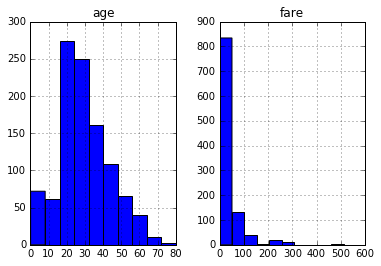

In [25]:
titanic_not_null[var_numericas].hist()

ahora vemos por supervivencia los datos.


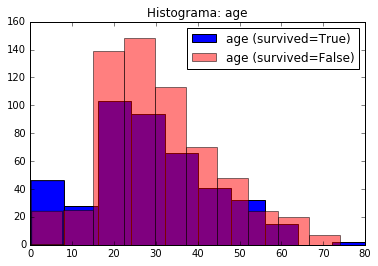

In [28]:
#Estudiamos la variable age.
import matplotlib.pyplot as plt
plt.hist(titanic_not_null['age'][var_target == True], bins=10, histtype='bar', color='blue', label='age (survived=True)') 
plt.hist(titanic_not_null['age'][var_target == False], bins=10, histtype='bar', color='red', label='age (survived=False)', alpha=0.5)
plt.title('Histograma: age')
plt.legend()
plt.show()

A partir de este grupo, veo que hay 3 grupos, entre 0 y 15, otro grupo entre 15 y 40 y otro grupo a partir de 40.
aunque por el histograma deducimos que el grupo de edad mayoritorio fue entre 15 y 35...y que de los supervivientes, el grupo que mas sobrevivieron en comparacion con el resto fue el de 0 a 15.
Voy a discretizar la variable edad.


In [29]:
titanic_not_null.loc[:, 'age_n'] = titanic_not_null['age'].map(lambda x: 'n0' if x < 15 else 'n1' if x < 40 else 'n2')
get_WoE(titanic_not_null, 'age_n', 'survived') 

Obteniendo el Woe para la variable age_n :
  El WoE para n0 [ 109 ] es -0.239672853265
  El WoE para n1 [ 692 ] es 0.446583355038
  El WoE para n2 [ 244 ] es 0.432864082296


In [30]:
#actualizo las variables de estudio.
var_categoricas = ['pclass','sibsp_n2','parch_n2','sex', 'age_n','embarked_n'] #modifico mi lista de variables de estudio.
var_numericas   = ['fare']


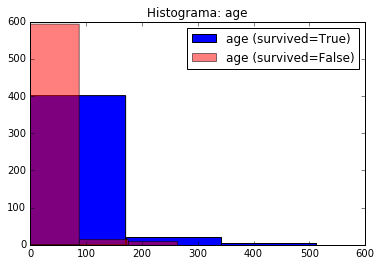

In [31]:
#Estudiamos la variable fare.
import matplotlib.pyplot as plt
plt.hist(titanic_not_null['fare'][var_target == True], bins=3, histtype='bar', color='blue', label='age (survived=True)') 
plt.hist(titanic_not_null['fare'][var_target == False], bins=3, histtype='bar', color='red', label='age (survived=False)', alpha=0.5)
plt.title('Histograma: age')
plt.legend()
plt.show()

Se ve que existen 3 niveles, uno con precios mas bajos entre 0 y 100. Otro entre 100 y 200 y otro a partir de 200.


In [36]:
titanic_not_null.loc[:, 'fare_n'] = titanic_not_null['fare'].map(lambda x: 'n0' if x < 100 else 'n1' if x < 200 else 'n2')
get_WoE(titanic_not_null, 'fare_n', 'survived') 

Obteniendo el Woe para la variable fare_n :
  El WoE para n0 [ 966 ] es 0.476737661427
  El WoE para n1 [ 43 ] es -0.949080554697
  El WoE para n2 [ 36 ] es -0.955511445027


Viendo el numero de ocurrencias y el resultado. Voy a agrupar en dos niveles. Uno con los valores positivos y otro con los negativos.

In [37]:
titanic_not_null.loc[:, 'fare_n2'] = None
titanic_not_null.loc[:, 'fare_n2'] = titanic_not_null['fare_n'].map(lambda x: 'n0' if x == 'n0' else 'n1')

get_WoE(titanic_not_null, 'fare_n2', 'survived') 

Obteniendo el Woe para la variable fare_n2 :
  El WoE para n0 [ 966 ] es 0.476737661427
  El WoE para n1 [ 79 ] es -0.952008814476


In [38]:
#actualizo las variables de estudio.
var_categoricas = ['pclass','sibsp_n2','parch_n2','sex', 'age_n','fare_n2','embarked_n'] #modifico mi lista de variables de estudio.
var_numericas   = [] #Ya no tengo variables numericas para el estudio
tabla_frecuencias()  #reviso otra vez las frecuencias despues de la discretización.

Tabla de frecuencias para: pclass
pclass      1    2    3
survived               
0         103  146  369
1         181  115  131

Tabla de frecuencias para: sibsp_n2
sibsp_n2   n0   n1
survived          
0         140  478
1         147  280

Tabla de frecuencias para: parch_n2
parch_n2   n0   n1
survived          
0         112  506
1         155  272

Tabla de frecuencias para: sex
sex       female  male
survived              
0             96   522
1            292   135

Tabla de frecuencias para: age_n
age_n     n0   n1   n2
survived              
0         48  422  148
1         61  270   96

Tabla de frecuencias para: fare_n2
fare_n2    n0  n1
survived         
0         596  22
1         370  57

Tabla de frecuencias para: embarked_n
embarked_n    C   n1
survived            
0            80  538
1           132  295



### 3. Seleccion de variables.

Una vez que hemos discretizado las variables, vamos a estudiar el Informative Value para ver cuales vamos a dejar en el modelo, analizando la capacidad de clasificacion de cada variable.


In [39]:
    from sklearn.linear_model.logistic import LogisticRegression

    result_IV = []

    for v_cat in var_categoricas:
        var_target = array(var_target)
        var_values = array(titanic_not_null[v_cat])
        var_levels = unique(var_values)

        mat_values = numpy.zeros(shape=(len(var_levels),2))

        for i in range(len(var_target)):
            # Obtención de la posición en los niveles del valor
            for j in range(len(var_levels)):
                if var_levels[j] == var_values[i]:
                    pos = j
                    break

            # Estimación del número valores en cada nivel
            if var_target[i]:
                mat_values[pos][0] += 1
            else:
                mat_values[pos][1] += 1

            # Obtención del IV
            IV = 0
            for j in range(len(var_levels)):
                if mat_values[j][0] > 0 and mat_values[j][1] > 0:
                    rt = mat_values[j][0] / (mat_values[j][0] + mat_values[j][1])
                    rf = mat_values[j][1] / (mat_values[j][0] + mat_values[j][1])
                    IV += (rt - rf) * np.log(rt / rf)

        # Se agrega el IV al listado
        result_IV.append(IV)

    for i in range(len(var_categoricas)):
        print "La variable", var_categoricas[i], "el IV es", result_IV[i]

La variable pclass el IV es 0.67613129015
La variable sibsp_n2 el IV es 0.140892620898
La variable parch_n2 el IV es 0.239028042454
La variable sex el IV es 1.35855179749
La variable age_n el IV es 0.218928011875
La variable fare_n2 el IV es 0.533310955061
La variable embarked_n el IV es 0.298119331691


Las variables que tienen poder de clasificacion fuerte son aquellas que tienen un valor por encima de 0.3, y las que tienen valores por encima de 0.5 son las que tienen un poder muy fuerte. 

Por tanto para realizar el modelo vamos a escoger : **pclass, sex y fare_n2 **

In [40]:
var_categoricas = ['pclass','sex', 'fare_n2' ] #actualizo mi lista de variables de estudio.


### 3.1 Generamos dummies

In [41]:
#vamos a ver que aportan las variables para la predicción del modelo.

from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

for v_cat in var_categoricas:
    dum_var    = pd.get_dummies(titanic_not_null[v_cat])
    features   = list(dum_var.columns)
    features.remove(features[1])
    classifier = LogisticRegression().fit(dum_var, var_target)
    y_pred     = classifier.predict(dum_var)
    
    print "**", v_cat
    print 'Precisión:', accuracy_score(y_pred, var_target)
    print 'Exactitud:', precision_score(y_pred, var_target)
    print 'Exhaustividad:', recall_score(y_pred, var_target)

** pclass
Precisión: 0.666028708134
Exactitud: 0.423887587822
Exhaustividad: 0.637323943662
** sex
Precisión: 0.778947368421
Exactitud: 0.683840749415
Exhaustividad: 0.752577319588
** fare_n2
Precisión: 0.624880382775
Exactitud: 0.133489461358
Exhaustividad: 0.721518987342


Las variables que tenemos son buenas a la hora de realizar la clasificación. 
Todas tienen una precision ( porcentaje de aciertos en positivos y negativos) por encima del 50%, siendo la de sexo la mejor.
La exactitud, que es el % de positivos que han acertado, en fare encontramos un  valor muy bajo..
Sin embargo en exhaustividad, que el % de positivos en el total de positivos, en las 3 tenemos valores muy buenos.
Pero sin duda, la mejor variable para predecir el modelo es la de sexo.

In [42]:
titanic_copi = titanic_not_null.copy(deep = True) #hacemos una copia de los datos, para no perderlos.
#titanic_not_null=titanic_copi

In [43]:

for column in var_categoricas:
    dummie = pd.get_dummies(titanic_not_null[column], prefix = column)
    names = list(dummie.columns)
    names.remove(names[0])
    titanic_not_null = pd.concat([titanic_not_null, dummie[names]], axis = 1)
    names = list(titanic_not_null.columns)
    names.remove(column)
    titanic_not_null = titanic_not_null[names]
    
titanic_not_null.describe()

,survived,age,sibsp,parch,fare,body,pclass_2,pclass_3,sex_male,fare_n2_n1
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,119.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,0.408612,29.851837,0.503349,0.421053,36.686080,160.033613,0.249761,0.478469,0.628708,0.075598
std,0.491813,14.389194,0.912471,0.840052,55.732533,98.082975,0.433082,0.499775,0.483382,0.264481
min,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,21.000000,0.000000,0.000000,8.050000,71.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,28.000000,0.000000,0.000000,15.750000,155.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,39.000000,1.000000,1.000000,35.500000,255.500000,0.000000,1.000000,1.000000,0.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,328.000000,1.000000,1.000000,1.000000,1.000000


### 3.2 Estudio de colinealidad.

De las variables que tenemos, vamos a ver si alguna es colineal y por tanto podemos quitarlas del modelo.

In [44]:
from sklearn.linear_model import LinearRegression

def calculateVIF(data):
    features = list(data.columns)
    num_features = len(features)
    
    model = LinearRegression()
    
    result = pd.DataFrame(index = ['VIF'], columns = features)
    result = result.fillna(0)
    
    for ite in range(num_features):
        x_features = features[:]
        y_featue = features[ite]
        x_features.remove(y_featue)
        
        x = data[x_features]
        y = data[y_featue]
        
        model.fit(data[x_features], data[y_featue])
        
        result[y_featue] = 1/(1 - model.score(data[x_features], data[y_featue]))
    
    return result

def selectDataUsingVIF(data, max_VIF = 5):
    result = data.copy(deep = True)
    
    VIF = calculateVIF(result)
    
    while VIF.as_matrix().max() > max_VIF:
        col_max = np.where(VIF == VIF.as_matrix().max())[1][0]
        features = list(result.columns)
        features.remove(features[col_max])
        result = result[features]
        
        VIF = calculateVIF(result)
        
    return result

In [45]:
#print titanic_not_null.describe()
var_categoricas = ['pclass_2','pclass_3','sex_male', 'fare_n2_n1' ] #actualizo mi lista de variables de estudio
calculateVIF(titanic_not_null[var_categoricas])

,pclass_2,pclass_3,sex_male,fare_n2_n1
VIF,1.705509,1.804808,1.034103,1.296733


Las variables tienen unos valores muy bajos, ninguna con valores superiores a 5. Con lo que no vamos a quitar ninguna variable del modelo.

## 4. Creación de una muestra de entrenamiento y validación


In [46]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(titanic_not_null[var_categoricas], titanic_not_null['survived'])
print titanic_not_null.shape,"xtrain:",  x_train.shape, "xtest", x_test.shape



(1045, 23) xtrain: (783, 4) xtest (262, 4)


## 5.  Analizando variables en el modelo.

In [74]:
def forward_regression(x,y):
    # Obtencion del conjunto de datos para validación
    x_train, x_test, y_train, y_test = train_test_split(x, y)

    # Modelo para realizar los ajustes
    model = LinearRegression()

    # Variable para almecena los índices de la lista de atributos usados
    feature_list = list(x.columns)
    feature_order = []
    feature_error = []
    feature_names = []

    # Iteración sobre todas las variables
    for i in range(len(feature_list)):
         
        idx_try = [val for val in range(len(feature_list)) if val not in feature_order]
        iter_error = []

        #print "idx_try ", idx_try, "feature_order" , feature_order
        
        for i_try in idx_try:
            useRow = feature_order[:]
            useRow.append(i_try)
    
            use_train = x_train[x_train.columns[useRow]]
            use_test = x_test[x_train.columns[useRow]]


            model.fit(use_train, y_train)
            rmsError = numpy.linalg.norm((y_test - model.predict(use_test)), 2)/sqrt(len(y_test))
            iter_error.append(rmsError)

        pos_best = numpy.argmin(iter_error)
        
        #el criterio de parada si el error aumenta nos salimos,
        if len(feature_error) == 0 or (iter_error[pos_best] < feature_error[-1]):
            feature_order.append(idx_try[pos_best])
            feature_error.append(iter_error[pos_best])
            feature_names.append(feature_list[idx_try[pos_best]])
            print "Paso", len(feature_error), "variable", feature_list[idx_try[pos_best]], "con RMS", iter_error[pos_best]
        else:
            return feature_names, feature_error, feature_names

    return feature_names, feature_order, feature_error

var_categoricas = ['pclass_2','pclass_3','sex_male', 'fare_n2_n1' ] #actualizo mi lista de variables de estudio

x=titanic_not_null[var_categoricas]
y=titanic_not_null['survived']
print forward_regression(x,y)

x=titanic_not_null[var_categoricas]
y=titanic_not_null['survived']
print Backward_regression(x, y)   #miro tambien que devuelve mi funcion.


Paso 1 variable sex_male con RMS 0.41219576915
Paso 2 variable pclass_3 con RMS 0.394691393476
Paso 3 variable pclass_2 con RMS 0.387484950444
(['sex_male', 'pclass_3', 'pclass_2'], [0.41219576915016953, 0.39469139347560755, 0.38748495044371667], ['sex_male', 'pclass_3', 'pclass_2'])
Inicio - tratando  [0, 1, 2, 3] - error : 0.395760531019
Paso  0 - tratando  [1, 2, 3] - error : 0.393892900161
(Index([u'pclass_3', u'sex_male', u'fare_n2_n1'], dtype='object'), 0.39389290016067857)


Variables a incluir en el modelo:
 ['sex_male', 'pclass_3', 'pclass_2']




### 6. Ejecucion del modelo.



In [49]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

def metricas_modelos(y_true, y_pred):
    from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

    # Obtención de matriz de confusión
    confusion_matrix = confusion_matrix(y_true, y_pred)

    print "La matriz de confusión es "
    print confusion_matrix

    print 'Precisión:', accuracy_score(y_true, y_pred) #ha acertado un 68 % de los casos.
    print 'Exactitud:', precision_score(y_true, y_pred) #% son verdad de los que he marcado.
    print 'Exhaustividad:', recall_score(y_true, y_pred) #% que he detectado como verdad sobre el total de los que son verdad.
    print 'F1:', f1_score(y_true, y_pred)

    false_positive_rate, recall, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(false_positive_rate, recall)

    print 'AUC:', auc(false_positive_rate, recall)

    plot(false_positive_rate, recall, 'b')
    plot([0, 1], [0, 1], 'r--')
    title('AUC = %0.2f' % roc_auc)

### 6.1 Regresion lineal.

In [77]:
from sklearn.cross_validation import train_test_split
var_categoricas=['sex_male', 'pclass_3', 'pclass_2'] #forward
x_train, x_test, y_train, y_test = train_test_split(titanic_not_null[var_categoricas], titanic_not_null['survived'])


La matriz de confusión es 
[[385  75]
 [109 214]]
Precisión: 0.765006385696
Exactitud: 0.740484429066
Exhaustividad: 0.66253869969
F1: 0.699346405229
AUC: 0.749747610715


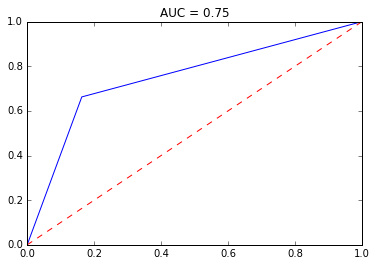

In [78]:

from sklearn.linear_model.logistic import LogisticRegression

classifier = LogisticRegression().fit(x_train, y_train)
y_pred     = classifier.predict(x_train)

metricas_modelos(y_train, y_pred)

La matriz de confusión es 
[[137  21]
 [ 26  78]]
Precisión: 0.820610687023
Exactitud: 0.787878787879
Exhaustividad: 0.75
F1: 0.768472906404
AUC: 0.808544303797


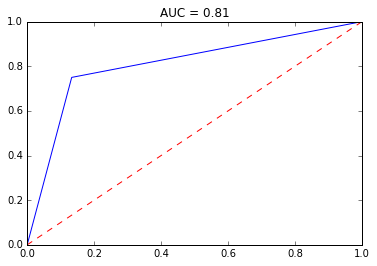

In [79]:
y_pred     = classifier.predict(x_test)
metricas_modelos(y_test, y_pred)

>El modelo de los datos de test es unas decimas mejor.


In [80]:
print 'R2 en entrenamiento es: ', classifier.score(x_train, y_train)
print 'R2 en validación es: ', classifier.score(x_test, y_test)



R2 en entrenamiento es:  0.765006385696
R2 en validación es:  0.820610687023


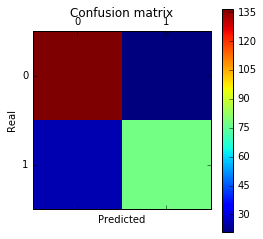

In [82]:

cm = confusion_matrix(y_test, y_pred) #SE INTRODUCEN LOS VALORES DE Y VERDADEROS, Y LOS PREDICHOS.
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Real')
plt.xlabel('Predicted')
plt.show()


En la matriz de confusion se puede ver que muchos mas acierto (TP) que del resto. 
El algoritmo acierta muy bien las muertes.




In [83]:
classifier.coef_

array([[-2.2196149 , -1.60864889, -0.88839738]])


>> ** Con lo que la supervivencia del titanic, dependió del sexo y de la clase en que viajaban **

Vamos a probar con otro modelo que evita el overfifting


In [92]:

x_train, x_test, y_train, y_test = train_test_split(titanic_not_null[var_categoricas], titanic_not_null['survived'])

from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha = 0.1)
model_ridge.fit(x_train, y_train)

predit_train = model_ridge.predict(x_train)
predit_test = model_ridge.predict(x_test)

# Evaluación de R2
print 'R2 en entrenamiento es: ', model_ridge.score(x_train, y_train)
print 'R2 en validación es: ', model_ridge.score(x_test, y_test)
print model_ridge.coef_



R2 en entrenamiento es:  0.379547429447
R2 en validación es:  0.251509192165
[-0.53277516 -0.29342783 -0.15632398]


Este modelo no sobreajusta como el anterior. 